In [1]:
import matplotlib
import pandas as pd
import seaborn as sbn

/home/antonio/virtualenvs/elbulli/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [3]:
raw_recipes_df = pd.read_csv('data/classified_raw_recipes.csv')

In [4]:
repr_recipes_df = pd.read_csv('data/classified_repr_recipes.csv')

In [5]:
raw_recipes_df.head()

,_id,title,year,ingredients,techniques,source,text,creativity
0,10000,"""Chocolate Sandwich Cookies I""",2001,"['cacao en polvo', 'huevos', 'leche', 'azúcar'...","['hornear', 'emulsionar', 'hornear', 'relleno'...",allrecipes,i_cacao_en_polvo i_huevos i_leche i_azúcar i_h...,0
1,100008,"""Homemade Pickled Ginger (Gari)""",2007,"['azúcar', 'vinagre de arroz', 'raíz']","['sal', 'hirviendo']",allrecipes,i_azúcar i_vinagre_de_arroz i_raíz t_sal t_hir...,30
2,10001,"""Chocolate Pizzelles""",2003,"['cacao en polvo', 'huevos', 'azúcar', 'harina...","['hornear', 'sal', 'rebozar']",allrecipes,i_cacao_en_polvo i_huevos i_azúcar i_harina i_...,0
3,100011,"""Pork and Black Bean Stew""",2007,"['cebolla', 'agua', 'pimiento', 'lomo de cerdo...","['hervir', 'cocer', 'sal']",allrecipes,i_cebolla i_agua i_pimiento i_lomo_de_cerdo i_...,0
4,10002,"""Peter Pan Cookies""",2000,"['azúcar moreno', 'bicarbonato', 'huevos', 'le...","['hornear', 'emulsionar', 'hornear', 'sal']",allrecipes,i_azúcar_moreno i_bicarbonato i_huevos i_leche...,0


In [6]:
repr_recipes_df.head()

,_id,title,year,ingredients,techniques,source,text,creativity
0,10000,"""Chocolate Sandwich Cookies I""",2001,"['cacao en polvo', 'huevos', 'leche', 'azúcar'...","['hornear', 'emulsionar', 'hornear', 'relleno'...",allrecipes,i_cacao_en_polvo i_huevos i_leche i_azúcar i_h...,0
1,100008,"""Homemade Pickled Ginger (Gari)""",2007,"['azúcar', 'vinagre de arroz', 'raíz']","['sal', 'hervir']",allrecipes,i_azúcar i_vinagre_de_arroz i_raíz t_sal t_hervir,30
2,10001,"""Chocolate Pizzelles""",2003,"['cacao en polvo', 'huevos', 'azúcar', 'harina...","['hornear', 'sal', 'rebozar']",allrecipes,i_cacao_en_polvo i_huevos i_azúcar i_harina i_...,0
3,100011,"""Pork and Black Bean Stew""",2007,"['cebolla', 'laurel', 'agua', 'pimiento', 'lom...","['hervir', 'cocer', 'sal']",allrecipes,i_cebolla i_laurel i_agua i_pimiento i_lomo_de...,0
4,10002,"""Peter Pan Cookies""",2000,"['azúcar moreno', 'bicarbonato', 'huevos', 'le...","['hornear', 'emulsionar', 'hornear', 'sal']",allrecipes,i_azúcar_moreno i_bicarbonato i_huevos i_leche...,0


In [7]:
raw_recipes_df['year'].value_counts().sort_index()

1998        7
1999        5
2000     4247
2001     6283
2002     5609
2003     2815
2004    20874
2005     4571
2006     7226
2007     8080
2008     5549
2009     4233
2010     3630
2011     2643
2012     4234
2013     3791
2014     3569
2015     3244
2016      362
Name: year, dtype: int64

In [22]:
raw_recipes_df[raw_recipes_df['source']=='allrecipes']['year'].value_counts().sort_index()

1999       1
2000    4245
2001    6283
2002    5609
2003    2808
2004    2492
2005    3382
2006    5145
2007    6442
2008    4661
2009    4148
2010    3621
2011    2640
2012    4234
2013    3791
2014    3569
2015    3239
2016     361
Name: year, dtype: int64

In [23]:
raw_recipes_df[raw_recipes_df['source']=='epicurious']['year'].value_counts().sort_index()

1998        7
1999        4
2000        2
2003        7
2004    18382
2005     1189
2006     2081
2007     1638
2008      888
2009       85
2010        9
2011        3
2015        5
2016        1
Name: year, dtype: int64

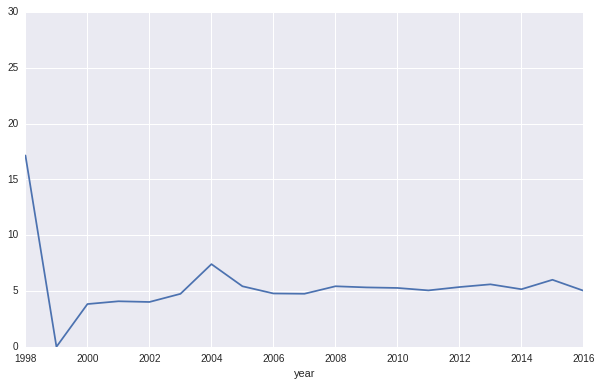

In [8]:
raw_recipes_df.groupby(['year']).mean()['creativity'].plot(
    xlim=[1998, 2016],
    ylim=[0, 30],
)

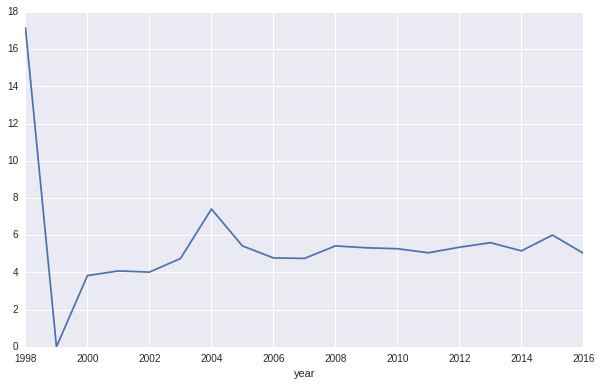

In [24]:
raw_recipes_df.groupby(['year']).mean()['creativity'].plot(
    xlim=[1998, 2016],
)

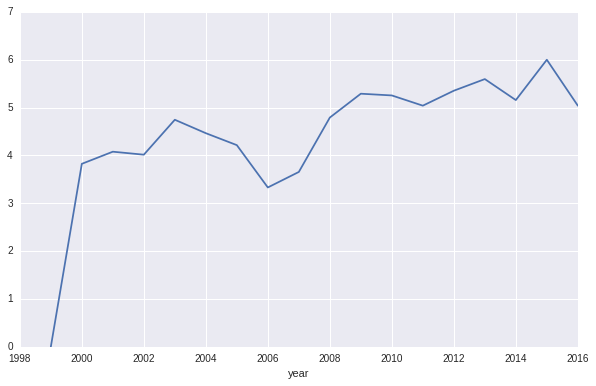

In [9]:
raw_recipes_df[raw_recipes_df['source']=='allrecipes'].groupby(['year']).mean()['creativity'].plot(
    xlim=[1998, 2016],
)

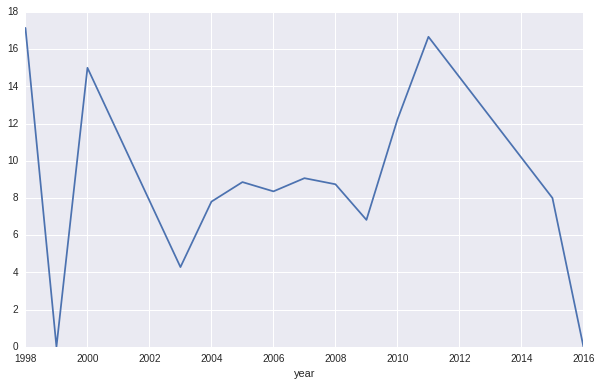

In [10]:
raw_recipes_df[raw_recipes_df['source']=='epicurious'].groupby(['year']).mean()['creativity'].plot(
    xlim=[1998, 2016]
)

In [20]:
raw_df = pd.DataFrame({
    'total': raw_recipes_df.groupby(['year']).mean()['creativity'],
    'allrecipes': raw_recipes_df[raw_recipes_df['source']=='allrecipes'].groupby(['year']).mean()['creativity'],
    'epicurious': raw_recipes_df[raw_recipes_df['source']=='epicurious'].groupby(['year']).mean()['creativity'],
})

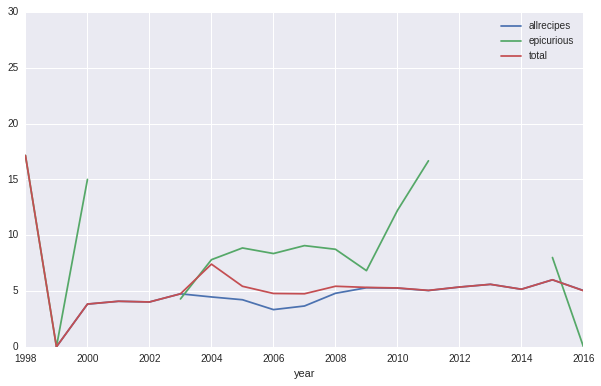

In [25]:
raw_df.plot(kind='line',
    xlim=[1998, 2016],
    ylim=[0, 30],
)